In [0]:
# Install a Drive FUSE wrapper.
# https://github.com/astrada/google-drive-ocamlfuse
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse


# Generate auth tokens for Colab
from google.colab import auth
auth.authenticate_user()


# Generate creds for the Drive FUSE library.
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'
# we need pillow version of 5.3.0
# we will uninstall the older version first
!pip uninstall -y Pillow
# install the new one
!pip install Pillow==5.3.0
# import the new one
import PIL
print(PIL.PILLOW_VERSION)
# this should print 5.3.0. If it doesn't, then restart your runtime:
# Menu > Runtime > Restart Runtime
import os 


E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131323 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

4.1.1


In [0]:
!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
  
!pip3 install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 

In [0]:
!pip install chainer

In [0]:
#!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)


In [0]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.listdir('/content/drive')

['My Drive', '.Trash']

In [0]:
!cp -r '/content/drive/My Drive/train_photos.zip' train_photos.zip
!unzip train_photos.zip


In [0]:
!ls

sample_data


In [0]:
from google.colab import files
files.upload()

Saving train_photo_to_biz_ids.csv to train_photo_to_biz_ids.csv
Saving validation_photo_to_biz_ids.csv to validation_photo_to_biz_ids.csv


{'train_photo_to_biz_ids.csv': b'photo_id,business_id,Label_0,Label_1,Label_2,Label_3,Label_4,Label_5,Label_6,Label_7,Label_8\r\n204149,3034,0,0,0,1,0,0,0,0,1\r\n52779,2805,0,1,1,1,0,1,1,1,0\r\n278973,485,0,1,1,1,1,1,1,1,0\r\n195284,485,0,1,1,1,1,1,1,1,0\r\n19992,485,0,1,1,1,1,1,1,1,0\r\n80748,485,0,1,1,1,1,1,1,1,0\r\n444996,1783,0,1,1,1,0,1,1,1,0\r\n200285,35,0,1,1,0,0,1,1,0,1\r\n90572,35,0,1,1,0,0,1,1,0,1\r\n27565,1313,0,0,0,1,0,0,1,0,1\r\n228371,1313,0,0,0,1,0,0,1,0,1\r\n166925,2787,0,0,0,1,0,1,0,0,1\r\n310868,3216,0,1,0,0,0,1,1,1,0\r\n13318,3385,0,0,1,0,1,1,1,0,0\r\n290904,2896,0,0,0,1,0,0,1,0,1\r\n71940,1193,0,1,1,0,0,1,1,0,0\r\n211449,1193,0,1,1,0,0,1,1,0,0\r\n368909,1193,0,1,1,0,0,1,1,0,0\r\n118126,1193,0,1,1,0,0,1,1,0,0\r\n188137,3703,0,0,0,1,0,0,0,0,1\r\n12355,3703,0,0,0,1,0,0,0,0,1\r\n232115,3703,0,0,0,1,0,0,0,0,1\r\n208176,3703,0,0,0,1,0,0,0,0,1\r\n362562,3909,1,1,0,0,0,0,0,0,1\r\n244500,3909,1,1,0,0,0,0,0,0,1\r\n18589,245,0,1,1,1,1,1,1,1,1\r\n186937,1605,0,1,0,0,0,0,0,0,1\r

In [0]:
import os
x = os.listdir('/content/train_photos')
x[0]

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import os
from PIL import Image
import math
import torch
import torch.nn as nn
import torchvision.models as models
from torch.nn import init
import functools
from torch.autograd import Variable
import numpy as np
import torch.nn.functional as F
from chainer.functions import spatial_pyramid_pooling_2d as spp_2d
%matplotlib inline
# Device configuration
use_cuda = True

In [0]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

if torch.cuda.is_available():
  # Make CuDNN Determinist
  torch.backends.cudnn.deterministic = True
  torch.cuda.manual_seed(seed)

# Define default device, we should use the GPU (cuda) if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [0]:
base = os.getcwd()

In [0]:
#Cell to verify data formats
test3 = pd.read_csv(base + '/train_photo_to_biz_ids.csv')
test4 = test3[test3['photo_id']==5].iloc[:,3:12].values[0].tolist()
test3.iloc[0,2:].values

array([0, 0, 0, 1, 0, 0, 0, 0, 1])

In [0]:
test3

In [0]:
print(os.path.isfile('train_photos/10.jpg'))

True


In [0]:
x = pd.read_csv("train_photo_to_biz_ids.csv")
x.head()

photo_id  business_id  Label_0  Label_1  Label_2  Label_3  Label_4  \
0    204149         3034        0        0        0        1        0   
1     52779         2805        0        1        1        1        0   
2    278973          485        0        1        1        1        1   
3    195284          485        0        1        1        1        1   
4     19992          485        0        1        1        1        1   

   Label_5  Label_6  Label_7  Label_8  
0        0        0        0        1  
1        1        1        1        0  
2        1        1        1        0  
3        1        1        1        0  
4        1        1        1        0

In [0]:
#Testing cell not used - Used for testing when creating data loader
path = base+'/train_photo_to_biz_ids.csv'
train_data = pd.read_csv(path,usecols=range(1),dtype = 'str') #nameframe
label_data=pd.read_csv(path,sep=",", usecols=[2], nrows=1000) #label_frame
root = base + '/train_photos'
transform = transforms.Compose([transforms.ToTensor()])

pic_name = os.path.join(root, train_data.iloc[1, 0]+'.jpg')
#pic_name = 'train_photos/2.jpg'
pic = Image.open(pic_name)
transform(pic)

print(train_data.iloc[1, 0]+'.jpg')
print(np.array(label_data.iloc[1,0].split()).astype('int'))


52779.jpg


AttributeError: ignored

In [0]:
yelpTrainSet = yelpDataset(text_file = base + '/train_photo_to_biz_ids.csv',
                           root_dir = base +'/train_photos',
                          transform = transforms.Compose([transforms.Resize((224,224)),
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(
                                                              mean = [0.485, 0.456, 0.406],
                                                              std = [0.229, 0.224, 0.225])]))

yelpTrainLoader = torch.utils.data.DataLoader(yelpTrainSet,batch_size=1,shuffle=True, num_workers=0)

yelpTestSet = yelpDataset(text_file = base + '/validation_photo_to_biz_ids.csv',
                          root_dir = base + '/train_photos',
                          transform = transforms.Compose([transforms.Resize((224,224)),
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(
                                                              mean = [0.485, 0.456, 0.406],
                                                              std = [0.229, 0.224, 0.225])]))

yelpTestLoader = torch.utils.data.DataLoader(yelpTestSet,batch_size=1,shuffle=True, num_workers=0)


print(len(yelpTrainSet))
print(len(yelpTrainLoader))
print(len(yelpTestSet))
print(len(yelpTestLoader))

In [0]:
import time
time1 = time.time()
for i_batch,sample_batched in enumerate(yelpTrainLoader,0):
    time2 = time.time()
    batch_size =sample_batched['image'].shape[0]
    image_size = sample_batched['image'].shape[1:4]
    n_labels = sample_batched['labels'].shape[1]
    if i_batch % 100 == 0:
      print('Batch: {} \t Batch Size:{} \t Image Size: {} \t Number of Labels: {}'.
            format(i_batch, batch_size, image_size,n_labels))
    if (time2 - time1) == 600:
      print("Running")
      time2 = time.time()
    

In [0]:
#No longer needed since we are normalizing based off the pretrained models
#Calculate mean &std
#x=[]
#for i_batch,sample_batched in enumerate(yelpTrainLoader,0):
#    numpy_image = sample_batched['image'].numpy()
#    x.append(np.mean(numpy_image, axis=(0,2,3)))

#image_mean=np.mean(x, axis= (0))
#image_std=np.std(x, axis=(0))

In [0]:
#No longer needed since we are normalizing based off the pretrained models
#Confirm images have been normalized appropriately with 0 mean and 1 std
#print(image_mean)
#print(image_std)

# Alexnet 

In [0]:
## AlexNet Without Spp
alexnetspp = models.AlexNet().to(device)
alex_net = models.alexnet(pretrained=True)
#alex_net.classifier._modules['1'] = nn.Linear(10752,4096)
alex_net.classifier._modules['6'] = nn.Linear(4096, 9)
learning_rate = .001


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
params = alexnetspp.parameters()
optimizer = torch.optim.Adam(params, lr=learning_rate)

print("START")

for epoch in range(1,6):
    time1 = time.time()
    alex_train(epoch)
    time2 = time.time()
    print((time2 - time1)/3600)
    
    alex_test(epoch)
    time3 = time.time()
    print((time3 - time2)/3600)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.torch/models/alexnet-owt-4df8aa71.pth
244418560it [00:04, 54850325.30it/s]


In [0]:
#Hyperparameter tuning - Grid Search 

learning_rates = [.1,.01,.001, .00001]
momentums = [.2, .3,.4,.5,.6, .7, .8, .9]
w = [.1,.01,.001, 0.0001]
criterion = nn.BCEWithLogitsLoss()

for i in [1,2]: #Test different optimizer
    for j in range(len(learning_rates)):    
        if i ==1:
            for k in range(len(momentums)):
                #Reset Model per test
                alex_net = models.alexnet(pretrained=True)
                for param in alex_net.parameters():
                    param.requires_grad = False
                alex_net.classifier._modules['6'] = nn.Linear(4096, 9)
                alex_net = alex_net.to(device) 
                
                optimizer = optim.SGD(alex_net.classifier._modules['6'].parameters(), 
                                  lr=learning_rates[j], momentum=momentums[k])
                
                print('Optimizer: SGD\tLearning Rate: {}\tMomentum: {}'.
                      format (learning_rates[j], momentums[k]))
                alex_train(1)
                
        else: 
            for k in range(len(w)):
                #Reset Model per test
                alex_net = models.alexnet(pretrained=True)
                for param in alex_net.parameters():
                    param.requires_grad = False
                alex_net.classifier._modules['6'] = nn.Linear(4096, 9)
                alex_net = alex_net.to(device)
                
                optimizer = optim.Adam(alex_net.classifier._modules['6'].parameters(), 
                                  lr=learning_rates[j], weight_decay = w[k], amsgrad=True)
        
                print('Optimizer: Adam\t Learning Rate: {}\t WeightDecay: {}'.
                      format (learning_rates[j], w[k]))
                alex_train(1)

Optimizer: SGD	Learning Rate: 0.1	Momentum: 0.2
Train Epoch:1  Accuracy: 0.71   Average Loss: 0.56  Precision: 0.72   F1 Score: 0.73

Optimizer: SGD	Learning Rate: 0.1	Momentum: 0.3
Train Epoch:1  Accuracy: 0.71   Average Loss: 0.56  Precision: 0.72   F1 Score: 0.73

Optimizer: SGD	Learning Rate: 0.1	Momentum: 0.4
Train Epoch:1  Accuracy: 0.71   Average Loss: 0.56  Precision: 0.73   F1 Score: 0.73

Optimizer: SGD	Learning Rate: 0.1	Momentum: 0.5
Train Epoch:1  Accuracy: 0.71   Average Loss: 0.56  Precision: 0.73   F1 Score: 0.73

Optimizer: SGD	Learning Rate: 0.1	Momentum: 0.6
Train Epoch:1  Accuracy: 0.71   Average Loss: 0.56  Precision: 0.73   F1 Score: 0.73

Optimizer: SGD	Learning Rate: 0.1	Momentum: 0.7
Train Epoch:1  Accuracy: 0.71   Average Loss: 0.57  Precision: 0.72   F1 Score: 0.72

Optimizer: SGD	Learning Rate: 0.1	Momentum: 0.8
Train Epoch:1  Accuracy: 0.70   Average Loss: 0.60  Precision: 0.72   F1 Score: 0.72

Optimizer: SGD	Learning Rate: 0.1	Momentum: 0.9
Train Epoch:1 

In [0]:
class yelpDatasetAlex(torch.utils.data.Dataset):
    
    def __init__(self,text_file,root_dir, transform):
        """
        Args:
            text_file(string): path to text file
            root_dir(string): directory with all train images
        """
        
        self.name_frame = pd.read_csv(text_file,sep=",",usecols=range(1),dtype = 'str',nrows = 200000)
        self.label_frame = pd.read_csv(text_file,sep=",",  nrows = 200000)
        self.root_dir = root_dir
        self.transform = transform
                                       
    def __len__(self):
        return len(self.name_frame)

    def __getitem__(self, idx):
        #photoid = self.name_frame.iloc[idx, 0]
        img_name = os.path.join(self.root_dir, self.name_frame.iloc[idx, 0]  +'.jpg')
        #print(img_name)
        image = Image.open(img_name)
        image = image.convert('RGB')
        image = self.transform(image) 
        labels = self.label_frame.iloc[idx,2:].values
        labels = np.array(labels)
        labels= torch.from_numpy(labels.astype('int'))

        #labels = self.label_frame.iloc[idx,0]
        #labels = labels.reshape(-1, 2)
        sample = {'image': image, 'labels': labels}
        
        return sample
    

In [0]:
#************************************#

### Without SPP training


yelpTrainSet = yelpDatasetAlex(text_file = base + '/train_photo_to_biz_ids.csv',
                           root_dir = base + '/train_photos',
                          transform = transforms.Compose([transforms.Resize((227,227)),
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(
                                                              mean = [0.485, 0.456, 0.406],
                                                              std = [0.229, 0.224, 0.225])]))

yelpTrainLoader = torch.utils.data.DataLoader(yelpTrainSet,batch_size= 256,shuffle=True, num_workers=0)

yelpTestSet = yelpDatasetAlex(text_file = base + '/validation_photo_to_biz_ids.csv',
                           root_dir = base + '/train_photos',
                          transform = transforms.Compose([transforms.Resize((227,227)),
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(
                                                              mean = [0.485, 0.456, 0.406],
                                                              std = [0.229, 0.224, 0.225])]))

yelpTestLoader = torch.utils.data.DataLoader(yelpTestSet,batch_size= 128 ,shuffle=True, num_workers=0)
print(len(yelpTrainSet))
print(len(yelpTrainLoader))
print(len(yelpTestSet))
print(len(yelpTestLoader))


# 4.2 Train the model
# 4.3 Please store and print training and validation loss&accuracy after each epoch
#********************************************#

train_losses = []
test_losses = []
acc_data_train=[]
acc_data_test=[]

def alex_train(epoch):
    alex_net.train()
    train_loss = 0
    TN = 0
    TP = 0
    FP = 0
    FN = 0
    for i, sample_batched in enumerate(yelpTrainLoader,1):
        
        inputs = sample_batched['image']
        labels = sample_batched['labels']
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        inputs = inputs.to(device)
        labels = labels.to(device)

        # forward + backward + optimize
        outputs = alex_net(inputs)
        outputs = outputs.to(device)
        # print(inputs.size(), outputs.size(), labels.size())
        loss = criterion(outputs.float(), labels.float())
        #print(loss)
        loss.backward()
        optimizer.step()
        
        train_loss+= loss.item()
        pred = (torch.sigmoid(outputs).data > 0.5).int()
        #print(pred)
        labels = labels.int()
        print(labels, outputs)
        
        TP += ((pred == 1) & (labels == 1) ).float().sum() #True Positive Count
        TN += ((pred == 0) & (labels == 0) ).float().sum() #True Negative Count
        FP += ((pred == 1) & (labels == 0) ).float().sum() #False Positive Count
        FN += ((pred == 0) & (labels == 1) ).float().sum() #False Negative Count
        #print('TP: {}\t TN: {}\t FP: {}\t FN: {}\n'.format(TP,TN,FP,FN) )    
    
    accuracy = (TP + TN)/(TP + TN + FP + FN)
    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    f1_score = 2 * (precision*recall)/(precision+recall)
    acc_data_train.append([TP, TN, FP, FN, accuracy, precision, recall, f1_score])
    train_loss=float(train_loss)/float(i)
    train_losses.append(train_loss)
    # print statistics        
    print('Train Epoch:{}  Accuracy: {:.2f}   Average Loss: {:.2f}  Precision: {:.2f}   F1 Score: {:.2f}\n'.
          format(epoch, accuracy, train_loss, precision, f1_score))
    
def alex_test(epoch):
    #Have our model in evaluation mode
    alex_net.eval()
    #Set losses and Correct labels to zero
    test_loss = 0
    TN = 0
    TP = 0
    FP = 0
    FN = 0
    with torch.no_grad():
        
        for i, sample_batched in enumerate(yelpTestLoader,1):
            inputs = sample_batched['image']
            print(inputs)
            labels = sample_batched['labels']
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = alex_net(inputs)
            outputs = outputs.to(device)
            loss = criterion(outputs.float(), labels.float())
            test_loss += loss.item()
            pred = (torch.sigmoid(outputs).data > 0.5).int()
            #print(pred)
            labels = labels.int()
            #print(labels)

            TP += ((pred == 1) & (labels == 1) ).float().sum() #True Positive Count
            TN += ((pred == 0) & (labels == 0) ).float().sum() #True Negative Count
            FP += ((pred == 1) & (labels == 0) ).float().sum() #False Positive Count
            FN += ((pred == 0) & (labels == 1) ).float().sum() #False Negative Count
            #print('TP: {}\t TN: {}\t FP: {}\t FN: {}\n'.format(TP,TN,FP,FN) )    

        accuracy = (TP + TN)/(TP + TN + FP + FN)
        precision = TP/(TP + FP)
        recall = TP/(TP + FN)
        f1_score = 2 * (precision*recall)/(precision+recall)
        acc_data_test.append([TP, TN, FP, FN, accuracy, precision, recall, f1_score])
        test_loss = float(test_loss)/float(i)
        test_losses.append(test_loss)
        # print statistics        
        print('Test Epoch:{}  Accuracy: {:.2f}   Average Loss: {:.2f}  Precision: {:.2f}   F1 Score: {:.2f}\n'.
              format(epoch, accuracy, test_loss, precision, f1_score))

alex_net = models.alexnet(pretrained=True)
for param in alex_net.parameters():
    param.requires_grad = False
alex_net.classifier._modules['6'] = nn.Linear(4096, 9)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(alex_net.parameters(), lr=0.01, momentum=0.9)

train_losses = []
test_losses = []
acc_data_train=[]
acc_data_test=[]

alex_net = alex_net.to(device)
alex_train(1)

print("START")

# import time

# #alex_test(0)
# for epoch in range(1,11):
#     time1 = time.time()
#     alex_train(epoch)
#     time2 = time.time()
#     print((time2 - time1)/3600)
    


200000
782
23483
184


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.torch/models/alexnet-owt-4df8aa71.pth
244418560it [00:02, 90168851.20it/s]


NameError: ignored

In [0]:

def spatial_pyramid_pooling(previous_conv, num_sample, previous_conv_size, out_pool_size):
    '''
    previous_conv: a tensor vector of previous convolution layer
    num_sample: an int number of image in the batch
    previous_conv_size: an int vector [height, width] of the matrix features size of previous convolution layer
    out_pool_size: a int vector of expected output size of max pooling layer
    
    returns: a tensor vector with shape [1 x n] is the concentration of multi-level pooling
    '''    
    # print(previous_conv.size())
    for i in range(len(out_pool_size)):
        # print(previous_conv_size)
        h_wid = int(math.ceil(previous_conv_size[0] / out_pool_size[i]))
        w_wid = int(math.ceil(previous_conv_size[1] / out_pool_size[i]))
        h_pad = int((h_wid*out_pool_size[i] - previous_conv_size[0] + 1)/2)
        w_pad = int((w_wid*out_pool_size[i] - previous_conv_size[1] + 1)/2)
        #print(h_wid, w_wid, h_pad, w_pad)
        kernelsize = (h_wid, w_wid)
        maxpool = nn.MaxPool2d(kernelsize, stride = kernelsize, padding = (h_pad, w_pad))
        x = maxpool(previous_conv)
        if(i == 0):
            spp = x.view(num_sample,-1)
            # print("spp size:",spp.size())
        else:
            # print("size:",spp.size())
            spp = torch.cat((spp,x.view(num_sample,-1)), 1)
    return spp

class AlexNetSPP(nn.Module):
    def __init__(self):#, embed_size):
        """Load the pretrained Alexnet and replace top fc layer."""
        super(AlexNetSPP, self).__init__()
        alex_net = models.alexnet(pretrained=True)
        #alex_net.classifier._modules['1'] = nn.Linear(10752,4096)
        alex_net.classifier._modules['6'] = nn.Linear(4096, 9)
        
        
        modules = list(alex_net.features.children())[:-2]    # delete the last maxpool layer.
        modules2 = list(alex_net.classifier.children())
        self.conv = nn.Sequential(*modules)
        self.classifier = nn.Sequential(*modules2)
        self.output_num = [4, 4, 2]        
        #self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)
        
    def forward(self, images):
        """Extract feature vectors from input images."""
        with torch.no_grad():
            features = self.conv(images)
            #print(features.size())
            #print(self.output_num)
            features = spatial_pyramid_pooling(features,1,
                                        [int(features.size(2)),
                                         int(features.size(3))],self.output_num)

            features = self.classifier(features)

        #print(np.shape(features))
        features = features.reshape(features.size(0), -1)
        #features = self.bn(features)
        return features
    
    
yelpTrainSet = yelpDatasetAlex(text_file = base + '/train_photo_to_biz_ids.csv',
                           root_dir = base + '/train_photos',
                          transform = transforms.Compose([#transforms.Resize((227,227)),
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(
                                                              mean = [0.485, 0.456, 0.406],
                                                              std = [0.229, 0.224, 0.225])]))

yelpTrainLoader = torch.utils.data.DataLoader(yelpTrainSet,batch_size= 1,shuffle=True, num_workers=0)

yelpTestSet = yelpDatasetAlex(text_file = base + '/validation_photo_to_biz_ids.csv',
                           root_dir = base + '/train_photos',
                          transform = transforms.Compose([#transforms.Resize((227,227)),
                                                          transforms.ToTensor(),
                                                          transforms.Normalize(
                                                              mean = [0.485, 0.456, 0.406],
                                                              std = [0.229, 0.224, 0.225])]))

yelpTestLoader = torch.utils.data.DataLoader(yelpTestSet,batch_size= 1 ,shuffle=True, num_workers=0)

print(len(yelpTrainSet))
print(len(yelpTrainLoader))
print(len(yelpTestSet))
print(len(yelpTestLoader))

alexnetspp = AlexNetSPP().to(device)

200000
200000
23483
23483


In [0]:
## With SPP Layer training

import torch.optim as optim

#************************************#

# 4.2 Train the model
# 4.3 Please store and print training and validation loss&accuracy after each epoch
#********************************************#

train_losses = []
test_losses = []
acc_data_train=[]
acc_data_test=[]

def alex_train(epoch):
    alexnetspp.train()
    train_loss = 0
    TN = 0
    TP = 0
    FP = 0
    FN = 0
    ImagesLost = 0
    for i, sample_batched in enumerate(yelpTrainLoader,1):
        
        inputs = sample_batched['image']
        labels = sample_batched['labels']
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # forward + backward + optimize
        try:
            outputs = alexnetspp(inputs)
            outputs = outputs.to(device)
            outputs.requires_grad = True
        
            #print(len(labels[0]), len(outputs[0]))
            loss = criterion(outputs.float(), labels.float())


            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            pred = (torch.sigmoid(outputs).data > 0.5).int()
            #print(pred)
            labels = labels.int()
            #print(labels)

            TP += ((pred == 1) & (labels == 1) ).float().sum() #True Positive Count
            TN += ((pred == 0) & (labels == 0) ).float().sum() #True Negative Count
            FP += ((pred == 1) & (labels == 0) ).float().sum() #False Positive Count
            FN += ((pred == 0) & (labels == 1) ).float().sum() #False Negative Count
            #print('TP: {}\t TN: {}\t FP: {}\t FN: {}\n'.format(TP,TN,FP,FN) )    

        except:
            ImagesLost += 1
        
        
    
    accuracy = (TP + TN)/(TP + TN + FP + FN)
    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    f1_score = 2 * (precision*recall)/(precision+recall)
    acc_data_train.append([TP, TN, FP, FN, accuracy, precision, recall, f1_score])
    train_loss=float(train_loss)/float(i)
    train_losses.append(train_loss)
    # print statistics        
    print('Train Epoch:{}  Accuracy: {:.2f}   Average Loss: {:.2f}  Precision: {:.2f}   F1 Score: {:.2f}\n'.
          format(epoch, accuracy, train_loss, precision, f1_score))
    print('Images Lost This Epoch', ImagesLost)
    
def alex_test(epoch):
    #Have our model in evaluation mode
    alexnetspp.eval()
    #Set losses and Correct labels to zero
    test_loss = 0
    TN = 0
    TP = 0
    FP = 0
    FN = 0
    ImagesLost = 0
    with torch.no_grad():
        
        for i, sample_batched in enumerate(yelpTestLoader,1):
            inputs = sample_batched['image']
            labels = sample_batched['labels']
            inputs = inputs.to(device)
            labels = labels.to(device)
            try:
                outputs = alexnetspp(inputs)
                outputs = outputs.to(device)
                loss = criterion(outputs.float(), labels.float())
                test_loss += loss.item()
                pred = (torch.sigmoid(outputs).data > 0.5).int()
                #print(pred)
                labels = labels.int()
                #print(labels)

                TP += ((pred == 1) & (labels == 1) ).float().sum() #True Positive Count
                TN += ((pred == 0) & (labels == 0) ).float().sum() #True Negative Count
                FP += ((pred == 1) & (labels == 0) ).float().sum() #False Positive Count
                FN += ((pred == 0) & (labels == 1) ).float().sum() #False Negative Count
                #print('TP: {}\t TN: {}\t FP: {}\t FN: {}\n'.format(TP,TN,FP,FN) ) 
            except:
                ImagesLost += 1
               

        accuracy = (TP + TN)/(TP + TN + FP + FN)
        precision = TP/(TP + FP)
        recall = TP/(TP + FN)
        f1_score = 2 * (precision*recall)/(precision+recall)
        acc_data_test.append([TP, TN, FP, FN, accuracy, precision, recall, f1_score])
        test_loss = float(test_loss)/float(i)
        test_losses.append(test_loss)
        # print statistics        
        print('Test Epoch:{}  Accuracy: {:.2f}   Average Loss: {:.2f}  Precision: {:.2f}   F1 Score: {:.2f}\n'.
              format(epoch, accuracy, test_loss, precision, f1_score))
        print('Images Lost This Epoch', ImagesLost)
        


train_losses = []
test_losses = []
acc_data_train=[]
acc_data_test=[]
alexnetspp = AlexNetSPP()
alexnetspp = alexnetspp.to(device)



learning_rate = .001



# Loss and optimizer

for param in alexnetspp.parameters():
    param.requires_grad = False


criterion = nn.BCEWithLogitsLoss()
params = alexnetspp.classifier._modules['6'].parameters()
optimizer = torch.optim.Adam(params, lr=learning_rate, weight_decay = .1, amsgrad=True)

print("START")
#alex_train(1)

# import time


# for epoch in range(1,11):
#     time1 = time.time()
#     alex_train(epoch)
#     time2 = time.time()
    
    
# torch.save(alex_net.state_dict(), 'AlexNetSPP.pt')
# !cp -r '/content/AlexNetSPP.pt' '/content/drive/My Drive/AlexNetSPP.pt'

#alex_test(1)


START


In [0]:
#Hyperparameter tuning - Grid Search for AlexNet with SPP on trainingdata

learning_rates = [.1,.01,.001, .00001]
momentums = [.2, .3,.4,.5,.6, .7, .8, .9]
w = [.1,.01,.001, 0.0001]
criterion = nn.BCEWithLogitsLoss()

for i in [1,2]: #Test different optimizer
    for j in range(len(learning_rates)):    
        if i ==1:
            for k in range(len(momentums)):
                #Reset Model per test
                alex_net = AlexNetSPP().to(device)
#                 for param in alex_net.parameters():
#                     param.requires_grad = False
#                 alex_net.classifier._modules['6'] = nn.Linear(4096, 9)
#                 alex_net = alex_net.to(device) 
                
                optimizer = optim.SGD(alex_net.classifier._modules['6'].parameters(), 
                                  lr=learning_rates[j], momentum=momentums[k])
                
                print('Optimizer: SGD\tLearning Rate: {}\tMomentum: {}'.
                      format (learning_rates[j], momentums[k]))
                alex_train(1)
                
        else: 
            for k in range(len(w)):
                #Reset Model per test
                alex_net = AlexNetSPP().to(device)
                
                
                optimizer = optim.Adam(alex_net.classifier._modules['6'].parameters(), 
                                  lr=learning_rates[j], weight_decay = w[k], amsgrad=True)
        
                print('Optimizer: Adam\t Learning Rate: {}\t WeightDecay: {}'.
                      format (learning_rates[j], w[k]))
                alex_train(1)

Optimizer: SGD	Learning Rate: 0.1	Momentum: 0.2
Train Epoch:1  Accuracy: 0.49   Average Loss: 0.71  Precision: 0.52   F1 Score: 0.48

Images Lost This Epoch 371
Optimizer: SGD	Learning Rate: 0.1	Momentum: 0.3
Train Epoch:1  Accuracy: 0.49   Average Loss: 0.71  Precision: 0.52   F1 Score: 0.48

Images Lost This Epoch 371
Optimizer: SGD	Learning Rate: 0.1	Momentum: 0.4
Train Epoch:1  Accuracy: 0.49   Average Loss: 0.71  Precision: 0.52   F1 Score: 0.48

Images Lost This Epoch 371
Optimizer: SGD	Learning Rate: 0.1	Momentum: 0.5
Train Epoch:1  Accuracy: 0.49   Average Loss: 0.71  Precision: 0.52   F1 Score: 0.48

Images Lost This Epoch 371
Optimizer: SGD	Learning Rate: 0.1	Momentum: 0.6
Train Epoch:1  Accuracy: 0.49   Average Loss: 0.71  Precision: 0.52   F1 Score: 0.48

Images Lost This Epoch 371
Optimizer: SGD	Learning Rate: 0.1	Momentum: 0.7
Train Epoch:1  Accuracy: 0.49   Average Loss: 0.71  Precision: 0.52   F1 Score: 0.48

Images Lost This Epoch 371
Optimizer: SGD	Learning Rate: 0.1	

**Loading The Model**

**Saving Model and Moving It to Drive**

In [0]:
torch.save(alex_net.state_dict(), 'Baseline.pt')
!cp -r '/content/Baseline.pt' '/content/drive/My Drive/Baseline.pt'


In [0]:
torch.save(alex_net.state_dict(), 'AlexNetSPP.pt')
!cp -r '/content/AlexNetSPP.pt' '/content/drive/My Drive/AlexNetSPP.pt'

In [0]:
# !cp -r '/content/drive/My Drive/Baseline.pt' '/content/Baseline.pt'
alex_net = models.alexnet(pretrained=True)
for param in alex_net.parameters():
    param.requires_grad = False
alex_net.classifier._modules['6'] = nn.Linear(4096, 9)

state_dict = torch.load('Baseline.pt')
alex_net.load_state_dict(state_dict['AlexNetBaseline_state_dict'])
alex_net = alex_net.to(device)

In [0]:
#Cell 7
#alexnetspp = AlexNetSPP()
alexnetspp = alexnetspp.to(device)
num_epochs = 5
total_step = len(yelpTrainLoader)
log_step = 1000
train_losses = []
criterion = nn.CrossEntropyLoss()
params = alexnetspp.classifier._modules['6'].parameters()
optimizer = torch.optim.Adam(params, lr=0.01)

for epoch in range(num_epochs):
    train_loss = 0
    spp_errors = 0
    for i, sample_batched in enumerate(yelpTrainLoader):
        
        # Set mini-batch dataset
        unsorted_images = sample_batched['image'].to(device)
        unsorted_labels = sample_batched['labels'].to(device)
        #unsorted_lengths = sample_batched['lengths']
        #sorted_length_index = sorted(range(len(unsorted_lengths)),key=unsorted_lengths.__getitem__,reverse=True)
        inputs =[]
        labels = []
        #lengths = []
        inputs.append(unsorted_images[0])
        labels.append(unsorted_labels[0])
        #lengths.append(unsorted_lengths[j])
            
        inputs =torch.stack(inputs)
        labels = torch.stack(labels)
        #lengths = torch.stack(lengths)
        #targets = pack_padded_sequence(labels , lengths, batch_first=True)[0]
        #print(labels)
        #print(targets)
        # Forward, backward and optimize
        try:
            features = alexnetspp(inputs)
            
        except:
            spp_errors += 1
            print("Total SPP Errors: " ,spp_errors)               
        
        #outputs = decoder(features,labels, lengths)
        #print(outputs)
        #print(np.shape(outputs))
        loss = criterion(features, labels)
        #decoder.zero_grad()
        #encoder.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        # Print log info
        if i % log_step == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Perplexity: {:5.4f}'
                  .format(epoch, num_epochs, i, total_step, loss.item(), np.exp(loss.item()))) 
    train_loss = train_loss/i
    train_losses.append([epoch, train_loss ])

In [0]:
torch.save(alexnetspp.state_dict(), 'AlexNetSPP.pt')
!cp -r '/content/Baseline.pt' '/content/drive/My Drive/Baseline.pt'

[1, 2, 3, 5, 7, 8]


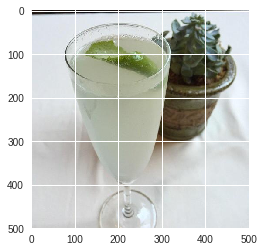

<start> good_for_lunch good_for_dinner takes_reservations restaurant_is_expensive has_table_service ambience_is_classy <end> 

[1, 2, 3, 4, 5, 6, 8]


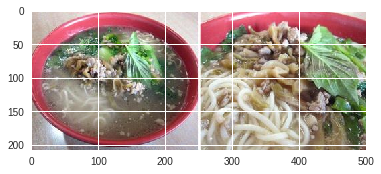

<start> good_for_lunch good_for_dinner takes_reservations outdoor_seating restaurant_is_expensive has_alcohol ambience_is_classy <end> 

[1, 2, 3, 4, 5, 6, 7, 8]


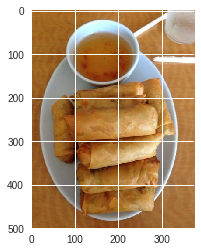

<start> good_for_lunch good_for_dinner takes_reservations outdoor_seating restaurant_is_expensive has_alcohol has_table_service ambience_is_classy <end> 

[2, 5, 6, 7, 8]


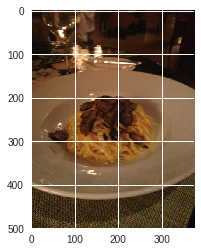

<start> good_for_dinner restaurant_is_expensive has_alcohol has_table_service ambience_is_classy <end> 

[1, 2, 3, 4, 8, 9]


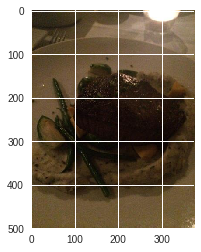

<start> good_for_lunch good_for_dinner takes_reservations outdoor_seating ambience_is_classy good_for_kids <end> 

[1, 2, 6, 7]


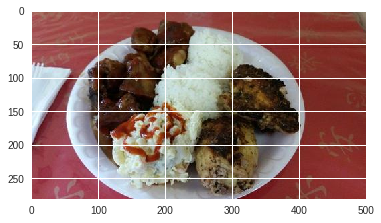

<start> good_for_lunch good_for_dinner has_alcohol has_table_service <end> 



In [0]:
import cv2
photos = ['200115','200116','200117','200119','200121', '200122']
def load_image(image_path, transform=None):
    image = Image.open(image_path)
    image = image.resize([227, 227], Image.LANCZOS)
    
    if transform is not None:
        image = transform(image).unsqueeze(0)
    
    return image

vocab = ['<padding>','good_for_lunch','good_for_dinner','takes_reservations',
         'outdoor_seating','restaurant_is_expensive',
         'has_alcohol','has_table_service','ambience_is_classy', 'good_for_kids','<start>', '<end>']

for i in photos:
    img_name = os.path.join('/content/train_photos', i  +'.jpg')

    transform = transforms.Compose([
        transforms.ToTensor(), 
        transforms.Normalize((0.485, 0.456, 0.406), 
                             (0.229, 0.224, 0.225))])
    alexnetspp.eval()
    
    # Prepare an image
    image = load_image(img_name, transform)
    image_tensor = image.to(device)
    
    # Generate an caption from the image
    features = alexnetspp(image_tensor)
    #sampled_ids = decoder.sample(feature)
    #sampled_ids = sampled_ids[0].cpu().numpy()          # (1, max_seq_length) -> (max_seq_length)
    
    pred = []
    x = features[0]
    for feature in range(len(x)):
        if x[feature] > 0.0:
            pred.append(feature + 1)
    print(pred)
    # Convert word_ids to words
    sampled_caption = ['<start>']
    for word_id in pred:
        sampled_caption.append(vocab[word_id])
    sampled_caption.append('<end>')
        
    sentence = ' '.join(sampled_caption)
    
    # Print out the image and the generated caption
    
    image = cv2.imread(img_name)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    plt.imshow(image)
    plt.show()
    print(sentence,'\n')